<a href="https://colab.research.google.com/github/aqililhanputra30/tugasclustering/blob/main/tugasclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [59]:
keywords=['BTR JUARA DUNIA PMCO']
start="2022–09–01"
end ="2022–10–14"
max_num=10
fname='tweet.json' 
languages=['id','en']

In [60]:
import pandas as pd
datatw=[]

In [61]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{'id': 1580400162085965824, 'username': 'kuydotid', 'date': datetime.datetime(2022, 10, 13, 3, 28, 55, tzinfo=datetime.timezone.utc), 'text': '3. Bigetron Red Aliens\n\nDi ranah PUBG Mobile, BTR RA juga dilabeli juara dunia usai memenangkan PUBG Mobile Club Open atau PMCO di tahun 2019.', 'url': 'https://twitter.com/kuydotid/status/1580400162085965824'}
{"id": 1580400162085965824, "username": "kuydotid", "date": "2022-10-13 03:28:55+00:00", "text": "3. Bigetron Red Aliens\n\nDi ranah PUBG Mobile, BTR RA juga dilabeli juara dunia usai memenangkan PUBG Mobile Club Open atau PMCO di tahun 2019.", "url": "https://twitter.com/kuydotid/status/1580400162085965824"}
{'id': 1545366362557595648, 'username': 'hanifdhz', 'date': datetime.datetime(2022, 7, 8, 11, 17, 7, tzinfo=datetime.timezone.utc), 'text': '@Satymir @akbarcadabraa @registaco Ehm sorry nih bukannya gimane2 gw fans boom juga. Tp BTR tim PUBG Mobile nya Pernah Juara Dunia bro 2x (PMCO Global Finals 2019 &amp; PMWL East 2020) di Regi

In [62]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [64]:
documents_clean

[' bigetron red aliens ranah pubg mobile btr ra label juara dunia usai menang pubg mobile club open pmco tahun ',
 'satymir akbarcadabraa registaco ehm sorry nih bukan gimane gw fans boom tp btr tim pubg mobile nya pernah juara dunia bro x pmco global finals amp pmwl east region sea pernah juara x runner up x',
 ' turnamen online yap semua rangkai turnamen pmpl selenggara cara online btr ra rupa tim sangat kuat turnamen offline raih gelar juara dunia dominasi pmco sea league turnamen gelar cara offline',
 'peringkat udah prediksi sejak awal zeus luar ekspektasi banyak orang keteter pas league gila final gokil parah sedang btr kurang perform awal banyak yg prediksi btr finish minimal top cara adalah juara dunia pmco musim lalu https t co ypyblfiva',
 'juga jd alesan knp btr ra juara dunia pmco kmrn krnnada org dewasa coboy turut gua pengaruh bgt liat jelas karna pas natic farwell dr ra cboy masuk lgsg ubah banget',
 'nonton ig tv nya pubg mobile id banyak bgt tim mau ngalahin btr wkwk y

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [69]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 ra
 org
 coboy
 dewasa
 dr
 dunia
 farwell
 pmco
 gua
 pengaruh
Cluster 1:
 juara
 nya
 dunia
 btr
 jam
 pubg
 cara
 hari
 mobile
 sea
Cluster 2:
 btr
 juara
 pmco
 dunia
 turnamen
 pubg
 mobile
 ra
 https
 tim




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
print("Prediction")
Y = cv.transform(["lesti marah"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["cerai"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [2]
Cluster number : [2]


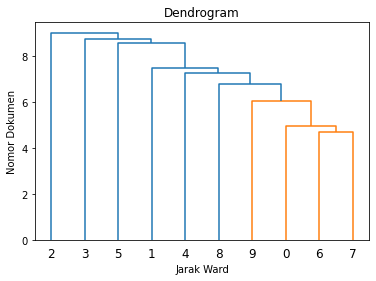

In [71]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

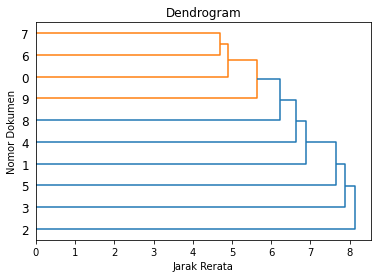

In [72]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()